# K-fold LightGBM:

In [1]:
import pandas
from sklearn.model_selection import KFold
#from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
import numpy as np
import pandas as pd
%run UtilsLightGBMFingerPrinting.ipynb

In [2]:
dataset = pd.read_csv("databasesTCC/Outdoordf.csv")
dataset.head()

,idx,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,...,ang_3,cos_3,sin_3,tg_3,delay_1,delay_2,delay_3,delay_12,delay_13,delay_23
0,6615,-91.447143,-86.358571,-92.294286,-93.300000,-79.3775,-69.268571,-90.256667,-90.577273,-95.8575,...,109.954589,-0.341275,0.939963,-2.754268,8,3,6,5,2,-3
1,6616,-96.240000,-86.358571,-94.300000,-93.021667,-92.6200,-69.268571,-90.256667,-90.577273,-95.8575,...,109.891893,-0.340247,0.940336,-2.763691,8,3,6,5,2,-3
2,6617,-91.447143,-80.920000,-92.294286,-93.021667,-79.3775,-61.360000,-90.256667,-90.577273,-95.8575,...,109.946260,-0.341139,0.940013,-2.755516,8,3,6,5,2,-3
3,6618,-90.180000,-86.358571,-92.294286,-93.021667,-79.3775,-69.268571,-90.256667,-90.577273,-95.8575,...,109.758570,-0.338057,0.941125,-2.783921,8,3,6,5,2,-3
4,6619,-91.447143,-86.358571,-92.294286,-91.240000,-79.3775,-69.268571,-90.256667,-87.720000,-95.8575,...,109.997568,-0.341980,0.939707,-2.747840,8,3,6,5,2,-3


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = dataset.iloc[:, 12:]
z = dataset.iloc[:, 0]
y_names = ['rssi_1_1','rssi_1_2','rssi_1_3','rssi_2_1','rssi_2_2','rssi_2_3','rssi_3_1','rssi_3_2','rssi_3_3']
#X = sc.fit_transform(X)
X = np.array(X)

In [4]:
#X = np.array(X)
scores = [] 
cv = KFold(n_splits=5, random_state=42, shuffle=True)# n_splits=5

In [5]:
y_columns_names = []
y_names = ['rssi_1_1','rssi_1_2','rssi_1_3','rssi_2_1','rssi_2_2','rssi_2_3','rssi_3_1','rssi_3_2','rssi_3_3']
columns = ['_Fold:1', '_Fold:2', '_Fold:3', '_Fold:4', '_Fold:5']
#columns = ['_Fold:1', '_Fold:2', '_Fold:3', '_Fold:4', '_Fold:5','_Fold:6','_Fold:7','_Fold:8','_Fold:9','_Fold:10']
i = 0
for label in y_names:
    #print(label)
    for fold in columns:
        #print(fold)
        #print(label + fold)
        y_columns_names.append(label + fold)
        i = i + 1
#y_columns_names

In [6]:
df_y_pred = pd.DataFrame(index = range(0,5986), columns= y_columns_names)
df_y_pred = df_y_pred.fillna(0) # with 0s rather than NaNs
df_y_pred.head()

,rssi_1_1_Fold:1,rssi_1_1_Fold:2,rssi_1_1_Fold:3,rssi_1_1_Fold:4,rssi_1_1_Fold:5,rssi_1_2_Fold:1,rssi_1_2_Fold:2,rssi_1_2_Fold:3,rssi_1_2_Fold:4,rssi_1_2_Fold:5,...,rssi_3_2_Fold:1,rssi_3_2_Fold:2,rssi_3_2_Fold:3,rssi_3_2_Fold:4,rssi_3_2_Fold:5,rssi_3_3_Fold:1,rssi_3_3_Fold:2,rssi_3_3_Fold:3,rssi_3_3_Fold:4,rssi_3_3_Fold:5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from memory_profiler import memory_usage
import numpy as np
import time
#T_Init = time.process_time() 

def FP_LIGHTGBM_K_FOLD():
    
    for i in range(1, 10):
        y = dataset.iloc[:, i]
        j = 1
        for train_index, test_index in cv.split(X):

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
            z_index = z[test_index]

            #X_train = sc.fit_transform(X_train)
            d_train = lgb.Dataset(X_train, label=y_train)
            params = {}
            params['learning_rate'] = 0.005 #0.003-> 0.005
            params['boosting_type'] = 'goss'
            params['metric'] = 'mse'

            params['max_depth'] = 7 #7 ok 
            params['num_leaves'] = 16 #16 ok
            params['min_data_in_leaf'] = 101 #ok101
            params['feature_fraction'] = 1.0 #ok
            params['lambda_l1'] = 0.001 #ok  
            params['lambda_l2'] = 8 #ok 8
            params['min_split_gain'] = 0.4 #0.4
            params['min_child_weight'] = 80 #52
            params['nthreads'] = 2 #ok
            params['top_rate'] = 0.90 #ok
            params['other_rate'] = 0.07 # ok

            """
            #01/11/20
            params['max_depth'] = 7 #7 ok
            params['num_leaves'] = 16 #32 ok
            params['min_data_in_leaf'] = 101 #ok
            params['feature_fraction'] = 1.0 #ok
            params['lambda_l1'] = 0.001 #ok  
            params['lambda_l2'] = 8 #ok 8
            params['min_split_gain'] = 8 #
            params['min_child_weight'] = 80 #52
            params['nthreads'] = 2 #ok
            params['top_rate'] = 0.90 #ok
            params['other_rate'] = 0.07 # ok
            params['max_bin'] = 255 #não tem

            params['max_depth'] = 7 #7 ok
            params['num_leaves'] = 32 #32 ok
            params['min_data_in_leaf'] = 51 #ok
            params['feature_fraction'] = 1.0 #ok
            params['lambda_l1'] = 0.1 #ok
            params['lambda_l2'] = 10 #ok
            params['min_split_gain'] = 4 #
            params['min_child_weight'] = 90 #52
            params['nthreads'] = 2 #ok
            params['top_rate'] = 0.90 #ok
            params['other_rate'] = 0.07 # ok
            #params['max_bin'] = 235#não tem"""

            #25/10 Boa acurácia
            """
            params['max_depth'] = 7 #7 ok
            params['num_leaves'] = 32 #32 ok
            params['min_data_in_leaf'] = 21 #ok
            params['feature_fraction'] = 1.0 #ok
            params['lambda_l1'] = 8.5 #ok
            params['lambda_l2'] = 10 #ok
            params['min_split_gain'] = 10 #
            params['min_child_weight'] = 41 #52
            params['nthreads'] = 2 #ok
            params['top_rate'] = 0.90 #ok
            params['other_rate'] = 0.07 # ok
            #params['max_bin'] = 235#não tem """
            #num_boost_round=550
            #1000 good

            clf = lgb.train(
                params,
                d_train,
                num_boost_round=1000,
                verbose_eval=100)


            #scores.append(best_svr.score(X_test, y_test))
            #X_test = pd.DataFrame(X_test)

            if( i == 5):
                z_index = pd.DataFrame(z_index, columns=["idx"])
                z_index.to_csv("./k-fold-LightGBM/Fold"+ str(j) +".csv", index=False)

            df_meds_CDB = pd.read_csv("./CDB/CDB_20.csv") #X_test
            df_meds_CDB = df_meds_CDB.drop("lat", axis = 1)
            df_meds_CDB = df_meds_CDB.drop("lon", axis = 1)
            X_test = df_meds_CDB
            #X_test = sc.transform(X_test)
            y_pred = clf.predict(X_test)
            df_y_pred[y.name+'_Fold:'+str(j)] = pd.DataFrame({y.name: y_pred})
            j = j + 1

    # CDB Fold:

    #range(1,11)
    for i in range(1,6):
        CDB_RSSI_LightGBM = [ ]
        CDB_RSSI_LightGBM = [df_y_pred['rssi_1_1_Fold:'+str(i)], df_y_pred['rssi_1_2_Fold:'+str(i)], df_y_pred['rssi_1_3_Fold:'+str(i)], df_y_pred['rssi_2_1_Fold:'+str(i)], df_y_pred['rssi_2_2_Fold:'+str(i)], df_y_pred['rssi_2_3_Fold:'+str(i)], df_y_pred['rssi_3_1_Fold:'+str(i)], df_y_pred['rssi_3_2_Fold:'+str(i)], df_y_pred['rssi_3_3_Fold:'+str(i)]]
        CDB_RSSI_LightGBM = pd.DataFrame(CDB_RSSI_LightGBM)
        CDB_RSSI_LightGBM = CDB_RSSI_LightGBM.T
        CDB_RSSI_LightGBM.rename(columns={'rssi_1_1_Fold:'+str(i):'rssi_1_1',
                                        'rssi_1_2_Fold:'+str(i):'rssi_1_2',
                                        'rssi_1_3_Fold:'+str(i):'rssi_1_3',
                                        'rssi_2_1_Fold:'+str(i):'rssi_2_1',
                                        'rssi_2_2_Fold:'+str(i):'rssi_2_2',
                                        'rssi_2_3_Fold:'+str(i):'rssi_2_3',
                                        'rssi_3_1_Fold:'+str(i):'rssi_3_1',
                                        'rssi_3_2_Fold:'+str(i):'rssi_3_2',
                                        'rssi_3_3_Fold:'+str(i):'rssi_3_3',
                                   }, 
                     inplace=True)
        CDB_RSSI_LightGBM.to_csv("./k-fold-LightGBM/CDB-Fold"+ str(i) +"-LightGBM.csv", index=False)

        df_meds_CDB = pd.read_csv("./CDB/CDB_20.csv")
        df_meds_CDB_LightGBM = pd.read_csv("./k-fold-LightGBM/CDB-Fold"+ str(i) +"-LightGBM.csv")
        df_meds_CDB_LightGBM['delay_1'] = df_meds_CDB['delay_1']
        df_meds_CDB_LightGBM['delay_2'] = df_meds_CDB['delay_2']
        df_meds_CDB_LightGBM['delay_3'] = df_meds_CDB['delay_3']
        df_meds_CDB_LightGBM['delay_12'] = df_meds_CDB['delay_12']
        df_meds_CDB_LightGBM['delay_13'] = df_meds_CDB['delay_13']
        df_meds_CDB_LightGBM['delay_23'] = df_meds_CDB['delay_23']
        df_meds_CDB_LightGBM['lat'] = df_meds_CDB['lat']
        df_meds_CDB_LightGBM['lon'] = df_meds_CDB['lon']
        df_meds_CDB_LightGBM.to_csv("./k-fold-LightGBM/CDB-Fold"+ str(i) +"-LightGBM.csv", index=False)
        #CDB_RSSI_SVR.head()

    #T_Finish = time.process_time()
    #T_Train = T_Finish - T_Init
mem_usage_FP_LIGHTGBM_K_FOLD = memory_usage(FP_LIGHTGBM_K_FOLD, interval=.1, timeout=1)

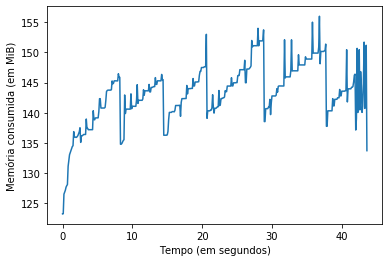

In [20]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0,0.1*len(mem_usage_FP_LIGHTGBM_K_FOLD),0.1),mem_usage_FP_LIGHTGBM_K_FOLD)
#plt.axis([0,45,120,180])
plt.ylabel('Memória consumida (em MiB)')
plt.xlabel('Tempo (em segundos)')
plt.show()

In [9]:
from pandas import DataFrame
df_FP_LIGHTGBM_K_FOLD = DataFrame (mem_usage_FP_LIGHTGBM_K_FOLD,columns=['FP_LithGBM_k-fold'])
round(df_FP_LIGHTGBM_K_FOLD.describe(), 2)

,FP_LithGBM_k-fold
count,437.00
mean,143.19
std,4.93
min,123.20
25%,140.60
50%,143.64
75%,146.18
max,156.02


# Gera Fold de Test outdoor e Indoor-outdoor:

In [81]:
    './k-fold-LightGBM/Fold6.csv',
    './k-fold-LightGBM/Fold7.csv',
    './k-fold-LightGBM/Fold8.csv',
    './k-fold-LightGBM/Fold9.csv',
    './k-fold-LightGBM/Fold10.csv', 

('./k-fold-LightGBM/Fold10.csv',)

In [ ]:
FILES = [
    
    './k-fold-LightGBM/Fold1.csv',
    './k-fold-LightGBM/Fold2.csv',
    './k-fold-LightGBM/Fold3.csv',
    './k-fold-LightGBM/Fold4.csv',
    './k-fold-LightGBM/Fold5.csv',
]

j = 1

for file in FILES:
    index = pd.read_csv(file)
    CDB_Meds_Outdoor = pd.read_csv("./databasesTCC/Outdoordf.csv")
    CDB_Meds_Outdoor = CDB_Meds_Outdoor.drop(['ang_1', 'ang_2', 'ang_3',
                                             'tg_1', 'tg_2', 'tg_3',
                                             'cos_1','cos_2','cos_3',
                                             'sin_1','sin_2','sin_3',
                                             'dist_1','dist_2','dist_3',
                                             'lat', 'lon'], axis = 1)
    x = index.loc[0]
    Test_Outdoor = GetFingerprintByIndex(x['idx'], CDB_Meds_Outdoor) 
    #k = 5 range(1,612)
    #k = 10 range(1,306)
    for i in range(1,612):
        x = index.loc[i]
        fingerprint = GetFingerprintByIndex(x['idx'], CDB_Meds_Outdoor)
        Test_Outdoor = Test_Outdoor.append(fingerprint)
    
    #k = 5 Test_Outdoor.sample(n = 400)
    #k = 10 Test_Outdoor.sample(n = 200)
    sample_n_outdoor = Test_Outdoor.sample(n = 400)
    rest_sample_n_outdoor = Test_Outdoor.drop(sample_n_outdoor.index) 
    Test_Outdoor = sample_n_outdoor
    Test_Outdoor = Test_Outdoor[['rssi_1_1','rssi_1_2','rssi_1_3','rssi_2_1','rssi_2_2','rssi_2_3','rssi_3_1','rssi_3_2',
                                'rssi_3_3','delay_1','delay_2','delay_3','delay_12','delay_13','delay_23','idx',]]
    Test_Outdoor.to_csv("./k-fold-LightGBM/Test-LightGBM-Outdoor-Fold"+ str(j) +".csv", index=False)
    
    Test_Indoor = pd.read_csv("./k-fold-LightGBM/Test-LightGBM-Indoor-Outdoor.csv")
    #Test_Indoor = Test_Indoor.sample(n = 100) # Só quando k = 10
    Test_Indoor = pd.read_csv("./k-fold-LightGBM/Indoor-Outdoor_Test.csv")# k = 5
    
    #k = 5 rest_sample_n_outdoor.sample.sample(n = 200)
    #k = 10 rest_sample_n_outdoor.sample.sample(n = 100)
    rest_sample_n_outdoor = rest_sample_n_outdoor.sample(n = 200)
    df_indoor_outdoor = pd.concat([rest_sample_n_outdoor, Test_Indoor], sort=True)
    df_indoor_outdoor = df_indoor_outdoor[['rssi_1_1','rssi_1_2','rssi_1_3','rssi_2_1','rssi_2_2','rssi_2_3','rssi_3_1','rssi_3_2',
                                'rssi_3_3','delay_1','delay_2','delay_3','delay_12','delay_13','delay_23','idx',]]
    df_indoor_outdoor.to_csv("./k-fold-LightGBM/Test-LightGBM-Indoor-Outdoor-Fold"+ str(j) +".csv", index=False)
    #print(j)
    j = j + 1
        #print(fingerprint)


# Gera Fold de Test Indoor:

In [ ]:
Indoor_Test_kfold10 = pd.read_csv("./k-fold-LightGBM/Indoor_Test.csv")
Indoor_Test_kfold10 = Indoor_Test_kfold10.sample(n = 200)
Indoor_Test_kfold10.to_csv("./k-fold-LightGBM/Indoor_Test_k_fold10.csv", index=False)
Indoor_Test_kfold10.head()